<a href="https://colab.research.google.com/github/Prethumnan/guvi-project/blob/main/Classification_problem_using_logistic_regression_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Reading the csv file
a=pd.read_csv("Titanic.csv")
a

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


**Data preprocessing**

In [3]:
#Dropping the columns which are not necessary
a.drop(columns=["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)

In [4]:
a

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [5]:
#Checkin null values
a.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [6]:
a["Age"].mode()

0    24.0
dtype: float64

In [7]:
a["Age"].fillna(24,inplace=True)

In [8]:
a["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
a["Embarked"].fillna("S",inplace=True)

In [10]:
a.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


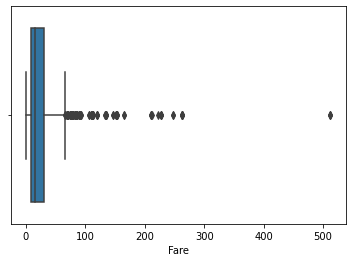

In [11]:
sns.boxplot(a["Fare"])

In [12]:
#Outlier treatment
a.iloc[a.loc[a["Fare"]>200].index,5]=40

**Exploratory data analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


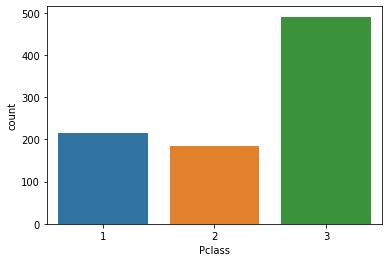

In [13]:
#Univariant analysis
sns.countplot(a["Pclass"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


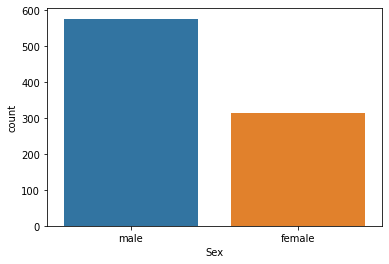

In [14]:
sns.countplot(a["Sex"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


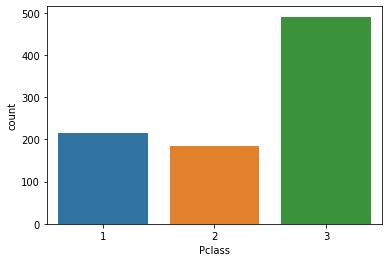

In [15]:
sns.countplot(a["Pclass"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


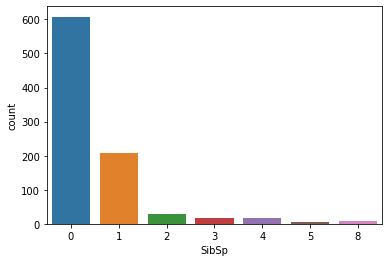

In [16]:
sns.countplot(a["SibSp"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


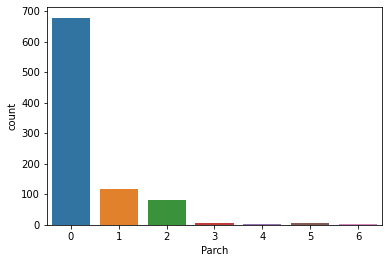

In [17]:
sns.countplot(a["Parch"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


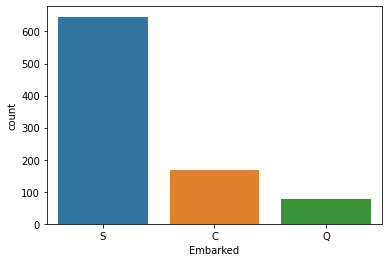

In [18]:
sns.countplot(a["Embarked"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


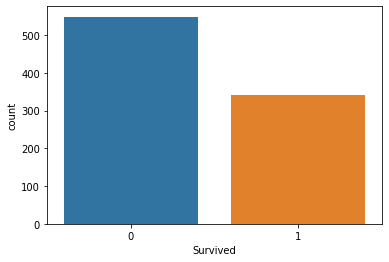

In [19]:
sns.countplot(a["Survived"])

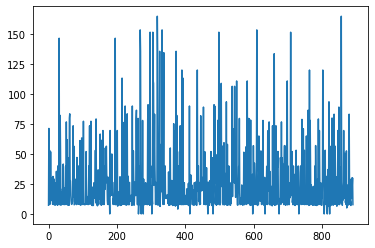

In [20]:
plt.plot(a["Fare"])

Text(0, 0.5, 'survived')

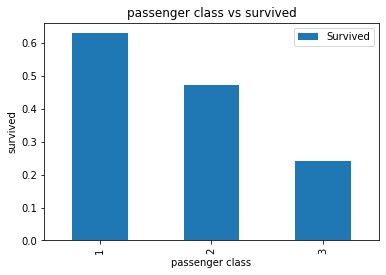

In [21]:
#Bivariant analysis
pclass=a.pivot_table(index="Pclass",values="Survived")
pclass.plot(kind="bar")
plt.title("passenger class vs survived")
plt.xlabel("passenger class")
plt.ylabel("survived")

Text(0, 0.5, 'survived')

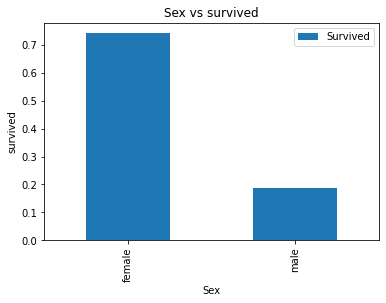

In [22]:
Sex=a.pivot_table(index="Sex",values="Survived")
Sex.plot(kind="bar")
plt.title("Sex vs survived")
plt.xlabel("Sex")
plt.ylabel("survived")

Text(0, 0.5, 'survived')

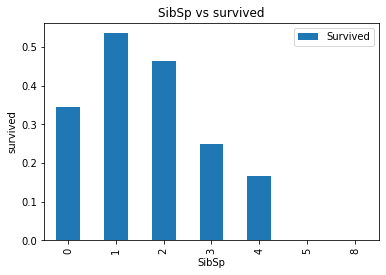

In [23]:
SibSp=a.pivot_table(index="SibSp",values="Survived")
SibSp.plot(kind="bar")
plt.title("SibSp vs survived")
plt.xlabel("SibSp")
plt.ylabel("survived")

Text(0, 0.5, 'survived')

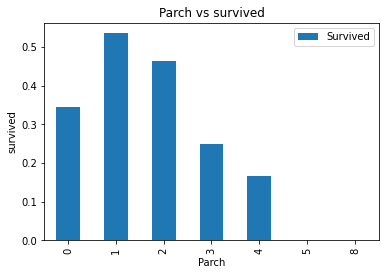

In [24]:
Parch=a.pivot_table(index="Parch",values="Survived")
SibSp.plot(kind="bar")
plt.title("Parch vs survived")
plt.xlabel("Parch")
plt.ylabel("survived")

Text(0, 0.5, 'survived')

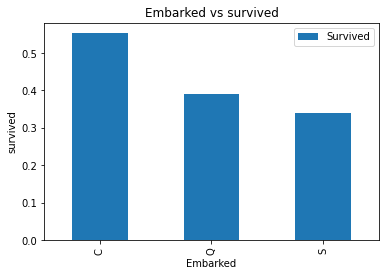

In [25]:
Embarked=a.pivot_table(index="Embarked",values="Survived")
Embarked.plot(kind="bar")
plt.title("Embarked vs survived")
plt.xlabel("Embarked")
plt.ylabel("survived")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


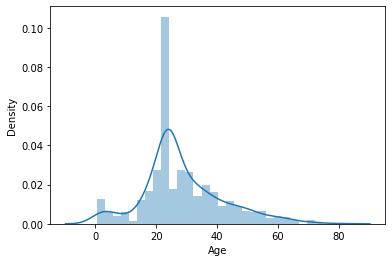

In [26]:
sns.distplot(a["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


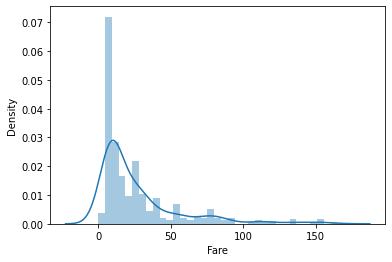

In [27]:
sns.distplot(a["Fare"])

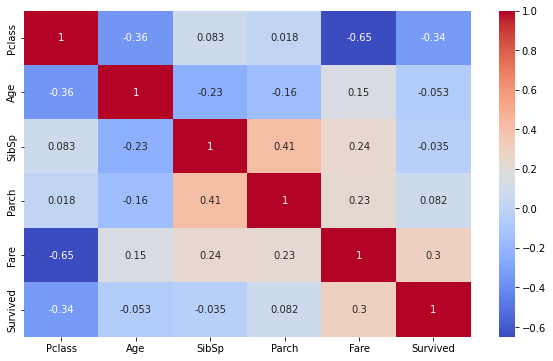

In [28]:
#Checking correlation
plt.figure(figsize=(10,6))
sns.heatmap(a.corr(),annot=True,cmap="coolwarm")

**Encoding**

In [29]:
#One-hot encoding
a=pd.get_dummies(a,columns=["Sex","Embarked","Pclass"])
a

,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,0,1,0,0,1,0,1,0
887,19.0,0,0,30.0000,1,1,0,0,0,1,1,0,0
888,24.0,1,2,23.4500,0,1,0,0,0,1,0,0,1
889,26.0,0,0,30.0000,1,0,1,1,0,0,1,0,0


**Scaling**

In [30]:
#Scaling down the data
scale=MinMaxScaler()
n=["Age","Fare"]
for i in n:
    a[i]= scale.fit_transform(a[[i]])
a

,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.271174,1,0,0.043975,0,0,1,0,0,1,0,0,1
1,0.472229,1,0,0.432369,1,1,0,1,0,0,1,0,0
2,0.321438,0,0,0.048069,1,1,0,0,0,1,0,0,1
3,0.434531,1,0,0.322078,1,1,0,0,0,1,1,0,0
4,0.434531,0,0,0.048827,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.078852,0,0,1,0,0,1,0,1,0
887,0.233476,0,0,0.181965,1,1,0,0,0,1,1,0,0
888,0.296306,1,2,0.142236,0,1,0,0,0,1,0,0,1
889,0.321438,0,0,0.181965,1,0,1,1,0,0,1,0,0


In [31]:
x=a.drop("Survived",axis=1)
y=a["Survived"]

**Model building**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
#Logistic regression model
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=model.predict(x_test)

In [36]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.7821229050279329


In [37]:
print("cross_val_score : ",cross_val_score(model,x,y))

cross_val_score :  [0.79329609 0.79213483 0.79213483 0.76404494 0.81460674]


In [38]:
print("Confusion matrix\n")
confusion_matrix(y_test,y_pred)

Confusion matrix



array([[92, 18],
       [21, 48]])

In [39]:
#Building random forest model
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
y_pre=forest.predict(x_test)

In [41]:
print("Accuracy : ",accuracy_score(y_test,y_pre))

Accuracy :  0.7877094972067039


In [42]:
print("cross_val_score : ",cross_val_score(forest,x,y))

cross_val_score :  [0.7877095  0.79775281 0.85955056 0.78089888 0.8258427 ]


In [43]:
print("Confusion matrix\n")
confusion_matrix(y_test,y_pre)

Confusion matrix



array([[92, 18],
       [20, 49]])